# Лабораторная работа №4

ФИО:  Пуцеловский Евгений Андреевич   
Группа: БИВТ-20-1 

Отправлять можно следующими способами (**обязательно указать свое ФИО и группу в каком-либо виде**):
1. Создать **приватный** репозиторий на github, добавить меня по нику (l3lush) в Collaborators (Settings -> Collaborators -> Add people)
2. Отправить заполненный ноутбук мне на почту avmysh@gmail.com, либо m1603956@edu.misis.ru
3. Отправить заполненный ноутбук мне в тг @l3lush. 

**Deadline**:
- hard -- **04.06.2023 23:59** (дедлайн теперь один)


**Что необходимо сделать** (можете вдохновляться ноутбуками для семинара, они должны помочь):
1. Загрузить датасет (вариант смотреть [здесь](https://docs.google.com/spreadsheets/d/1pFk1qZJtMrV8GWUmdSjV5Kz6JnFdBQDShErFZ337FDc/edit?usp=sharing))
2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).
3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).
4. Оформить датасет из шага 3 в Dataloader.
5. Реализовать архитектуру собственной нейросети и натренировать ее на датасете (можно не обучать 1000 эпох, достаточно 10 эпох, но чтобы метрики начали улучшаться).
6. Обучить нейросеть, используя Transfer Learning. Модель можно выбрать на свой вкус (список всех моделей, доступных в torchvision есть [тут](https://pytorch.org/vision/stable/models.html)).
7. Посчитать метрики качества финальной модели, сделать выводы.

**Замечание**  
Если понимаете, что данные слишком много весят, или с датасетом что-то не так, можете брать любой другой.  

P.S. Чтобы не ждать века, тренируйте модели на Colab с использованием GPU (Runtime -> Change runtime type -> GPU)  
P.S.S. Сохраняйте вывод ячеек и пушьте вместе с ним, в противном случае я не смогу нормально проверить все работы, если буду запускать все ноутбуки и ждать обучение моделей

# Пример, как загружать данные

In [2]:
# in Colab
!pip install datasets  
# локально придется установить эту библиотеку через консоль

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.6/474.6 kB 26.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 17.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.5/212.5 kB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.3/134.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 37.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 27.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.5/114.5 kB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 34.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 19.9 MB/s eta 0:00:00


# 1. Загрузить датасет

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor, Normalize, Lambda
import matplotlib.pyplot as plt

In [21]:
# from datasets import load_dataset
# dataset = load_dataset('cifar100')  # тут надо написать название вашего датасета
training_data = datasets.CIFAR100(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.CIFAR100(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

Files already downloaded and verified
Files already downloaded and verified


In [40]:
open test

SyntaxError: ignored

# 2. Описать кратенько словами датасет, описать поставку задачи, что от чего отличаем, привести примеры картинок (картинки можно визуализировать после шага 3, когда у вас будет красивый датасет).

29
74
55
28
23
98
60
41
44


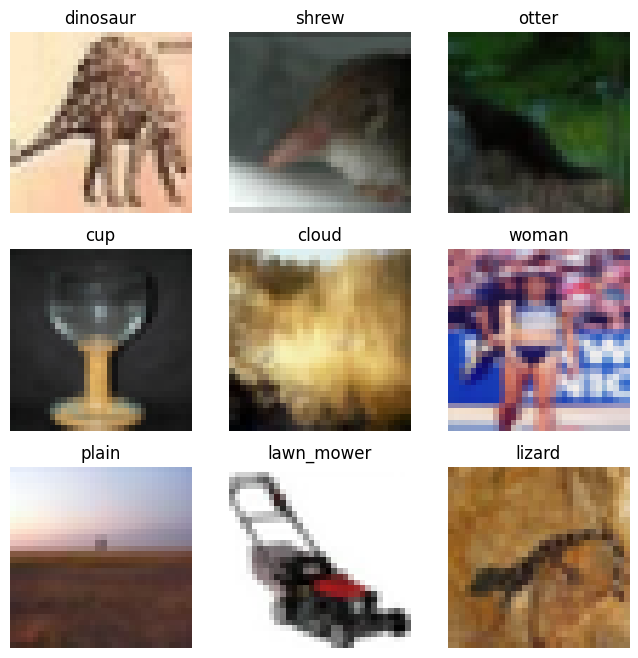

In [5]:
labels_map = {
        0: 'apple',  
        1: 'aquarium_fish',
        2: 'baby',
        3: 'bear',
        4: 'beaver',
        5: 'bed',
        6: 'bee',
        7: 'beetle',
        8: 'bicycle',
        9: 'bottle',
        10: 'bowl',
        11: 'boy',
        12: 'bridge',
        13: 'bus',
        14: 'butterfly',
        15: 'camel',
        16: 'can',
        17: 'castle',
        18: 'caterpillar',
        19: 'cattle',
        20: 'chair',
        21: 'chimpanzee',
        22: 'clock',
        23: 'cloud',
        24: 'cockroach',
        25: 'couch',
        26: 'crab',
        27: 'crocodile',
        28: 'cup',
        29: 'dinosaur',
        30: 'dolphin',
        31: 'elephant',
        32: 'flatfish',
        33: 'forest',
        34: 'fox',
        35: 'girl',
        36: 'hamster',
        37: 'house',
        38: 'kangaroo',
        39: 'computer_keyboard',
        40: 'lamp',
        41: 'lawn_mower',
        42: 'leopard',
        43: 'lion',
        44: 'lizard',
        45: 'lobster',
        46: 'man',
        47: 'maple_tree',
        48: 'motorcycle',
        49: 'mountain',
        50: 'mouse',
        51: 'mushroom',
        52: 'oak_tree',
        53: 'orange',
        54: 'orchid',
        55: 'otter',
        56: 'palm_tree',
        57: 'pear',
        58: 'pickup_truck',
        59: 'pine_tree',
        60: 'plain',
        61: 'plate',
        62: 'poppy',
        63: 'porcupine',
        64: 'possum',
        65: 'rabbit',
        66: 'raccoon',
        67: 'ray',
        68: 'road',
        69: 'rocket',
        70: 'rose',
        71: 'sea',
        72: 'seal',
        73: 'shark',
        74: 'shrew',
        75: 'skunk',
        76: 'skyscraper',
        77: 'snail',
        78: 'snake',
        79: 'spider',
        80: 'squirrel',
        81: 'streetcar',
        82: 'sunflower',
        83: 'sweet_pepper',
        84: 'table',
        85: 'tank',
        86: 'telephone',
        87: 'television',
        88: 'tiger',
        89: 'tractor',
        90: 'train',
        91: 'trout',
        92: 'tulip',
        93: 'turtle',
        94: 'wardrobe',
        95: 'whale',
        96: 'willow_tree',
        97: 'wolf',
        98: 'woman',
        99: 'worm',
}
figure = plt.figure(figsize=(8, 8))
cols, rows = 3, 3
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(training_data), size=(1,)).item()
    img, label = training_data[sample_idx]
    img = img.swapaxes(0,1)
    img = img.swapaxes(1,2)
    print(label)
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()

# 3. Оформить датасет в виде объекта класса Dataset из PyTorch (обязательно надо сделать препроцессинг данных: нормализовать данные, добавить аугментации к данным и пр.).

In [28]:
import pandas as pd
import numpy as np


class CustomImageDataset(Dataset):
    def __init__(self, data, transform=None, target_transform=None):
        self.data = data
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return self.data.shape[0]

    def __getitem__(self, idx):
        image, label = self.data[idx]
        if self.transform:
            image = self.transform(image)
        if self.target_transform:
            label = self.target_transform(label)
        return image, label

In [23]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

In [29]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [27]:
idx = 100
training_data[idx]

(tensor([[[0.5922, 0.5686, 0.5529,  ..., 0.5843, 0.5529, 0.5569],
          [0.5725, 0.5765, 0.5569,  ..., 0.5765, 0.5529, 0.5216],
          [0.5686, 0.5647, 0.5412,  ..., 0.5686, 0.5490, 0.5294],
          ...,
          [0.4627, 0.3098, 0.3176,  ..., 0.4706, 0.4471, 0.4588],
          [0.4980, 0.4353, 0.4078,  ..., 0.5843, 0.5020, 0.4706],
          [0.4588, 0.4784, 0.4863,  ..., 0.5294, 0.4510, 0.4627]],
 
         [[0.5647, 0.5412, 0.5255,  ..., 0.5569, 0.5216, 0.5255],
          [0.5294, 0.5333, 0.5137,  ..., 0.5412, 0.5176, 0.4863],
          [0.5137, 0.5098, 0.4902,  ..., 0.5333, 0.5137, 0.4902],
          ...,
          [0.3961, 0.2745, 0.2902,  ..., 0.3804, 0.3608, 0.3882],
          [0.4235, 0.3882, 0.3686,  ..., 0.4784, 0.4039, 0.3922],
          [0.3725, 0.4196, 0.4353,  ..., 0.4588, 0.3882, 0.4000]],
 
         [[0.3373, 0.3137, 0.2980,  ..., 0.3176, 0.2824, 0.2863],
          [0.3098, 0.3137, 0.2941,  ..., 0.3137, 0.2941, 0.2627],
          [0.2941, 0.2941, 0.2745,  ...,

In [30]:
data_train = CustomImageDataset(training_data, transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), target_transform=Lambda(lambda y: torch.zeros(100, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

In [31]:
data_test = CustomImageDataset(test_data, transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]), target_transform=Lambda(lambda y: torch.zeros(100, dtype=torch.float).scatter_(0, torch.tensor(y), value=1)))

In [32]:
data_train[0]

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


TypeError: ignored

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=64, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=64, shuffle=True)

Feature batch shape: torch.Size([64, 3, 32, 32])
Labels batch shape: torch.Size([64])


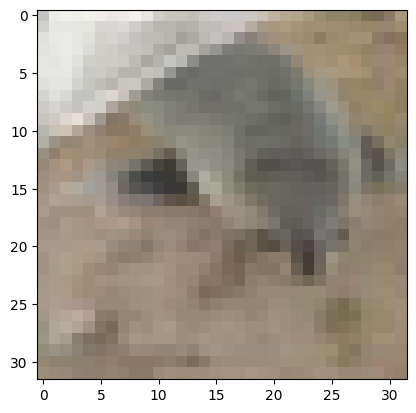

Label: seal


In [7]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[5].squeeze()
label = labels_map[train_labels.numpy()[5]]
img = img.swapaxes(0,1)
img = img.swapaxes(1,2)
plt.imshow(img)
plt.show()
print(f"Label: {label}")